In [1]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt

import hist
import scipy
from scipy import optimize

In [2]:
datadir = "/home/chardong/y_identification/Venv/save_pkl/df_test_sample_hard_scattering/"
savedir = "/home/chardong/y_identification/save_plots/"

In [3]:
df = pd.read_pickle(datadir+"df_test_sample_hard_scattering_skim30.pkl")
#df.head()

In [4]:
df.head()

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score
0,51.956734,2.267797,-1.499033,49.392670,3,48.548934,0.0,31.5,False,False,12.533671,2.266477,0.998945,0.001055
1,34.364429,-1.958636,1.959331,317.343506,1,38.855491,0.0,47.5,False,False,26.214190,-1.961529,0.894247,0.105753
2,39.007401,0.172711,-0.628337,9999.000000,0,554.386153,1.0,29.5,True,True,37.140778,0.202515,0.026289,0.973711
3,86.679977,0.162386,2.113541,9999.000000,0,40.708948,1.0,22.5,True,True,86.595421,0.162440,0.029999,0.970001
4,281.008636,-0.796674,0.281347,9999.000000,0,0.283104,1.0,28.5,True,True,282.742554,-0.796599,0.020765,0.979235


# Calculer des statistiques par bin 

## Evt_mu distribution

## density = true : intégrale sur la plage  égale à 1, histogramme -> estimation de densité de probabilité.
Hauteur du bin = Nombre d’éléments dans le bin / Largeur du bin × Nombre total d’éléments dans les donneés 

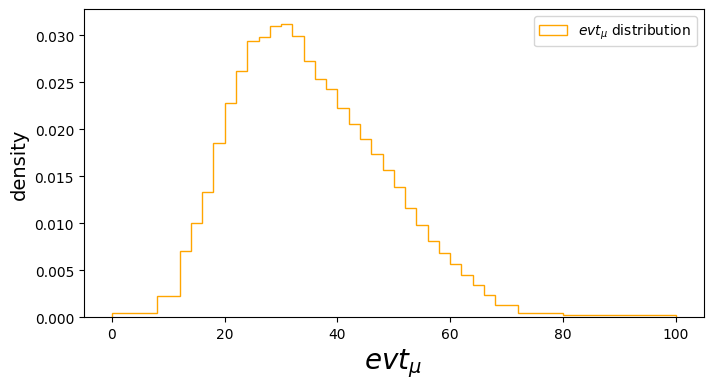

In [5]:
#  bins
mu_bins = [0., 4., 8., 12.,14., 16.,18., 20., 22., 24., 26., 28., 30., 32.,
               34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
               62., 64.,66., 68., 72., 76., 80., 100]

# Histogramme
histo, bin_edges = np.histogram(df['evt_mu'], bins=mu_bins, density=True)

# Plot
plt.figure(figsize=(8, 4))

plt.hist(df['evt_mu'], bins=mu_bins, density=True, label='$evt_{\mu}$ distribution', color='orange', histtype='step')

plt.ylabel("density", fontsize=14)
plt.xlabel("$evt_{\mu}$ ", fontsize=20)
plt.legend()

#plt.savefig(savedir + "variables_distrib_simple_plots/evt_mu_distribution_sample_hard_scattering")
plt.show()


In [6]:
print(f" evt_mu min :{df['evt_mu'].min():.2f}")
print(f" evt_mu max :{df['evt_mu'].max():.2f}")

 evt_mu min :0.50
 evt_mu max :99.50


## y_eta distribution

Fonctionnement de .index():

La méthode index() prend un ensemble de valeurs, ici df['y_abs_eta'], et renvoie une série ou une liste de numéros d'index correspondant aux bins auxquels chaque valeur appartient. Par exemple, si df['y_abs_eta'] contient une valeur de 0.75, et que eta_bins définit des bins de bordures [0, 0.5, 1.0, 1.5, ...], alors .index() retournera 1 pour cette valeur, indiquant que 0.75 appartient au bin compris entre 0.5 et 1.0.

En d'autres termes, .index() est une méthode pratique pour mapper chaque valeur de df['y_abs_eta'] à son bin correspondant défini par eta_bins.

In [7]:
edges_eta = [0 , 0.4 , 0.6  ,  0.8  ,  1.15  ,  1.37  , 1.52 ,  1.81  ,  2.01  ,  2.37,  2.45 ]

axis_eta = hist.axis.Variable(edges_eta,  name="eta", label=r"$\eta$") # Bordures de l'histogramme pour la variable y_abs_eta.

# Adding column with absolute eta value, assuming symmetry
df['y_abs_eta'] = np.abs(df['y_eta'])

In [8]:
print(type(edges_eta))

<class 'list'>


In [9]:
df =  df.assign(eta_bins=axis_eta.index(df['y_abs_eta']))  #Mapper les valeur de pseudorapidité aux bins définis par axis_eta.

df.head()

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score,y_abs_eta,eta_bins
0,51.956734,2.267797,-1.499033,49.392670,3,48.548934,0.0,31.5,False,False,12.533671,2.266477,0.998945,0.001055,2.267797,8
1,34.364429,-1.958636,1.959331,317.343506,1,38.855491,0.0,47.5,False,False,26.214190,-1.961529,0.894247,0.105753,1.958636,7
2,39.007401,0.172711,-0.628337,9999.000000,0,554.386153,1.0,29.5,True,True,37.140778,0.202515,0.026289,0.973711,0.172711,0
3,86.679977,0.162386,2.113541,9999.000000,0,40.708948,1.0,22.5,True,True,86.595421,0.162440,0.029999,0.970001,0.162386,0
4,281.008636,-0.796674,0.281347,9999.000000,0,0.283104,1.0,28.5,True,True,282.742554,-0.796599,0.020765,0.979235,0.796674,2


<function matplotlib.pyplot.show(close=None, block=None)>

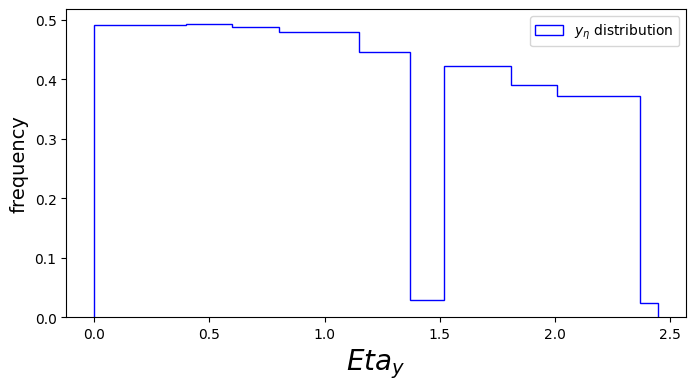

In [10]:
plt.figure(figsize=(8,4))

plt.hist(df['y_abs_eta'], bins = edges_eta, label='$y_{\eta}$ distribution', density=True, color='blue', histtype='step')

plt.ylabel("frequency",  fontsize=14)
plt.xlabel("$Eta_y$ ",  fontsize=20)

plt.legend()

#plt.savefig(savedir + "variables_distrib_simple_plots/y_eta_distribution_sample_hard_scattering")
plt.show

In [11]:
print(f" y_eta min: {df['y_eta'].min():.2f}")
print(f" y_eta max :{df['y_eta'].max():.2f}")

 y_eta min: -2.45
 y_eta max :2.44


# $\eta$ and $\mu$ bins for histogramming

# evt_mu

In [12]:
edges_mu_bkg = [0., 4., 8., 12.,14., 16.,18., 20., 22., 24., 26., 28., 30., 32.,
               34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
               62., 64.,66., 68., 72., 76., 80., 100]
edges_mu_sig = [0., 4., 8., 12.,14., 16.,18., 20., 22., 24., 26., 28., 30., 32.,
               34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
               62., 64.,66., 68., 72., 76., 80., 100]

In [13]:
axis_mu_sig = hist.axis.Variable(edges_mu_sig, name='evt_mu', label=r"$evt_\mu$ [GeV]")
axis_mu_bkg = hist.axis.Variable(edges_mu_bkg, name='evt_mu', label=r"$evt_\mu$ [GeV]")

In [14]:
# Preselection on photon passin Loose cut-based selection 
df = df.query('y_IsLoose == 1')

# Assiging indices correspoding to bins to each event in dataset
df = df.assign(mu_bin_sig=axis_mu_sig.index(df['evt_mu']))       #Mapper les valeur de evt_mu aux bins définis par axis_mu_sig.
df = df.assign(mu_bin_bkg=axis_mu_bkg.index(df['evt_mu']))

In [15]:
df.head()

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score,y_abs_eta,eta_bins,mu_bin_sig,mu_bin_bkg
2,39.007401,0.172711,-0.628337,9999.0,0,554.386153,1.0,29.5,True,True,37.140778,0.202515,0.026289,0.973711,0.172711,0,11,11
3,86.679977,0.162386,2.113541,9999.0,0,40.708948,1.0,22.5,True,True,86.595421,0.162440,0.029999,0.970001,0.162386,0,8,8
4,281.008636,-0.796674,0.281347,9999.0,0,0.283104,1.0,28.5,True,True,282.742554,-0.796599,0.020765,0.979235,0.796674,2,11,11
6,59.986805,-1.329535,1.144537,9999.0,0,94.620789,1.0,42.5,True,False,58.435268,-1.346292,0.027042,0.972958,1.329535,4,18,18
7,401.259369,0.836519,-1.640876,9999.0,0,0.639481,1.0,54.5,True,True,399.329315,0.836874,0.019330,0.980670,0.836519,3,24,24


# Selection & Cut-based Tight identification

In [16]:
df_sig = df.query('truth_label==1')
df_bkg = df.query('truth_label==0')

In [17]:
print(f'   Signal dataset size = {len(df_sig):7d}')
print(f'Background dataset size = {len(df_bkg):7d}')

   Signal dataset size = 2301038
Background dataset size =  186284


In [18]:
df_sig_tight = df_sig[(df_sig["y_IsTight"]==1)]
df_bkg_tight = df_bkg[(df_bkg["y_IsTight"]==1)]

In [19]:
print(f'   Signal dataset size = {len(df_sig_tight):7d}')
print(f'Background dataset size = {len(df_bkg_tight):7d}')

   Signal dataset size = 2132650
Background dataset size =   39568


In [20]:
# Convertir les histogrammes en listes ou arrays pour tracer avec matplotlib
mu_sig = axis_mu_sig.centers
mu_bkg = axis_mu_bkg.centers

### Remplir les histogrammes den_sig et den_bkg en comptant combien de valeurs evt_mu se trouvent dans chaque bin préalablement défini par les axes axis_mu_sig et axis_mu_bkg.

La méthode .fill() utilise les bordures de bins définies par axis_mu_sig et axis_mu_bkg pour trier les valeurs de evt_mu des DataFrames df_sig et df_bkg dans les bins appropriés.

In [25]:
# Histograms and Axes pour `mu`
den_mu_sig = hist.Hist(axis_mu_sig).fill(df_sig["evt_mu"])
den_mu_bkg = hist.Hist(axis_mu_bkg).fill(df_bkg["evt_mu"])

num_mu_sig_tight = hist.Hist(axis_mu_sig).fill(df_sig_tight["evt_mu"])
num_mu_bkg_tight = hist.Hist(axis_mu_bkg).fill(df_bkg_tight["evt_mu"])

## Normalisation de chaque histogramme en divisant les valeurs de l'histogramme par la largeur de chaque bin.

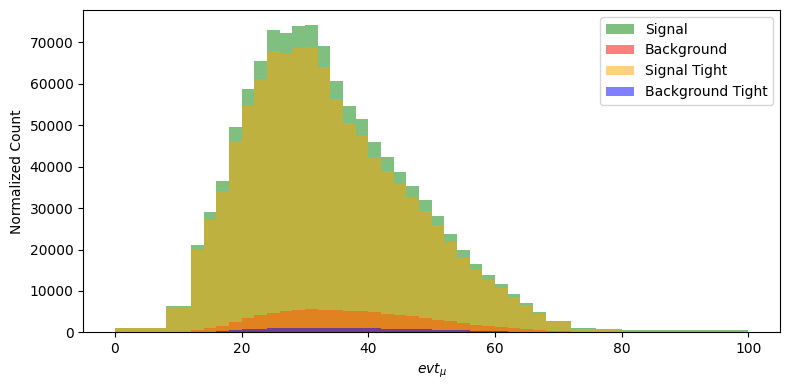

In [26]:
# Ajuste les hauteurs des bins de sorte que l'aire sous l'histogramme représente le total 
# normalisé par la largeur du bin, -> donne une mesure de la densité sur l'axe des x.

# Normalize histograms by the bin width
def normalize_hist(histogram):
    bin_widths = np.diff(histogram.axes[0].edges)   # Calcule la largeur de chaque bin.
    hist_values = histogram.values() / bin_widths   # Nombre par unité de mesure sur l'axe des x
    return hist_values, bin_widths 

# Normalize and plot the histograms
fig, ax = plt.subplots(figsize=(8, 4))

# Signal
signal_values, signal_widths = normalize_hist(den_mu_sig)
ax.bar(den_mu_sig.axes[0].centers, signal_values, width=signal_widths, color='green', alpha=0.5, label='Signal')

# Background
background_values, background_widths = normalize_hist(den_mu_bkg)
ax.bar(den_mu_bkg.axes[0].centers, background_values, width=background_widths, color='red', alpha=0.5, label='Background')

# Signal Tight
signal_tight_values, signal_tight_widths = normalize_hist(num_mu_sig_tight)
ax.bar(num_mu_sig_tight.axes[0].centers, signal_tight_values, width=signal_tight_widths, color='orange', alpha=0.5, label='Signal Tight')

# Background Tight
background_tight_values, background_tight_widths = normalize_hist(num_mu_bkg_tight)
ax.bar(num_mu_bkg_tight.axes[0].centers, background_tight_values, width=background_tight_widths, color='blue', alpha=0.5, label='Background Tight')

ax.set_xlabel("$evt_{\mu}$")
ax.set_ylabel("Normalized Count")
ax.legend()
plt.tight_layout()
# Save the figure
# plt.savefig(savedir + "variables_distrib_simple_plots/Bin_adjust_bkg+sig_MU_distribution_sample_hard_scattering")
plt.show()


## Histogramme normalisé par la densité de sorte que l'aire sous l'histogramme soit égale à 1.

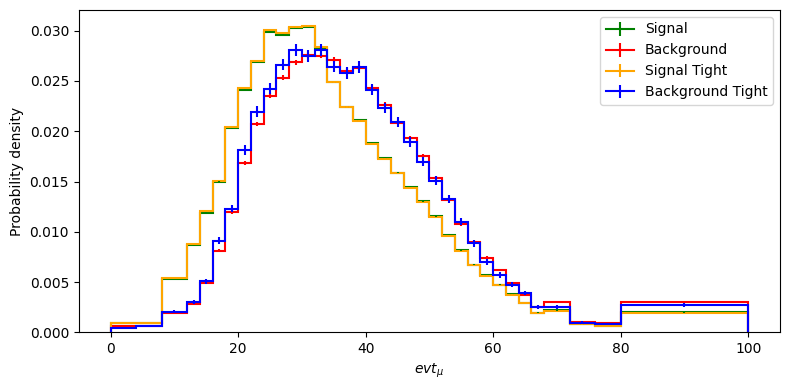

In [27]:
plt.figure(figsize=(8, 4))

den_mu_sig.plot1d(label='Signal', density=True, color='green')
den_mu_bkg.plot1d(label='Background', density=True, color='red')

num_mu_sig_tight.plot1d(label='Signal Tight', density=True, color='orange')
num_mu_bkg_tight.plot1d(label='Background Tight', density=True, color='blue')

plt.xlabel("$evt_{\mu}$")
plt.ylabel("Probability density")
plt.legend()
plt.tight_layout()
#plt.savefig("/home/chardong/y_identification/Venv/save_plots/variables_distrib_simple_plots/Bin_adjust_bkg+sig_MU_distribution_sample_hard_scattering")
plt.show()

# Compute efficiency and rejection for CBT ID on evt_mu parameter :

In [28]:
eff_mu_sig_tight = (num_mu_sig_tight/den_mu_sig).values()
efferr_mu_sig_tight = np.sqrt(eff_mu_sig_tight*(1.-eff_mu_sig_tight)/den_mu_sig.values()) # binomial uncertainty on efficiency

eff_mu_bkg_tight = (num_mu_bkg_tight/den_mu_bkg).values()
efferr_mu_bkg_tight = np.sqrt(eff_mu_bkg_tight*(1.-eff_mu_bkg_tight)/den_mu_bkg.values()) # binomial uncertainty on efficiency

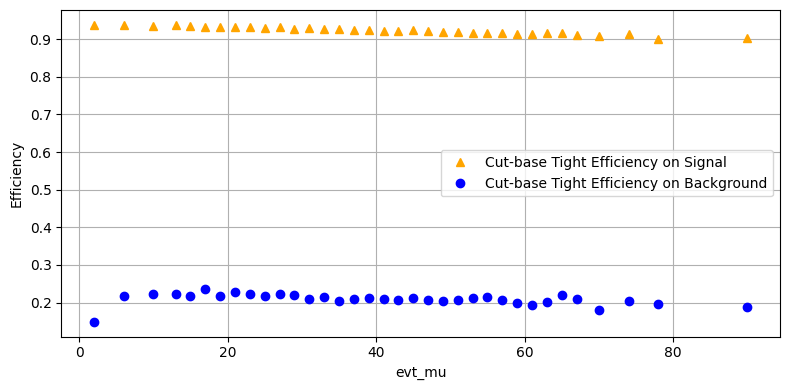

In [29]:
plt.figure(figsize=(8, 4))

plt.errorbar(mu_sig, eff_mu_sig_tight, label="Cut-base Tight Efficiency on Signal ", fmt="^", color="orange")
plt.errorbar(mu_bkg, eff_mu_bkg_tight, label="Cut-base Tight Efficiency on Background", fmt="o", color="blue")


plt.xlabel("evt_mu")
plt.ylabel("Efficiency")
plt.legend()
plt.grid()
plt.tight_layout()

#plt.savefig(savedir + "CBTeff_rejection_efficiency/CBTeff_evt_mu.pdf")
plt.show()

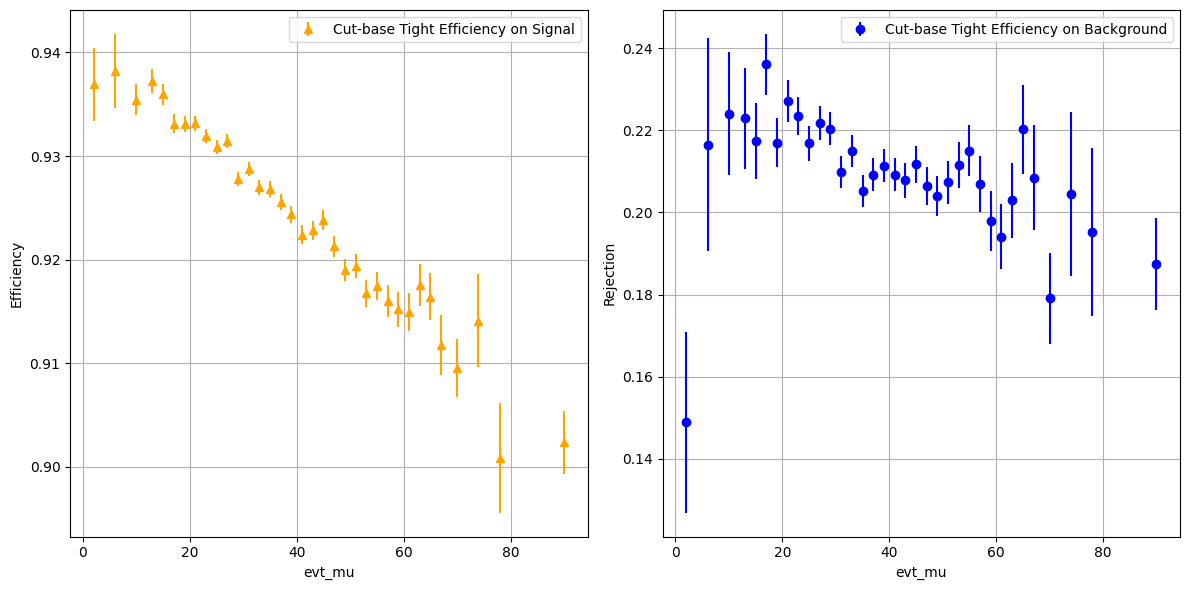

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# signal
ax[0].errorbar(mu_sig, eff_mu_sig_tight, yerr=efferr_mu_sig_tight, label="Cut-base Tight Efficiency on Signal", fmt='^', color="orange")
ax[0].set_xlabel("evt_mu")
ax[0].set_ylabel("Efficiency")
ax[0].legend()
ax[0].grid(True)

# background
ax[1].errorbar(mu_bkg, eff_mu_bkg_tight, yerr=efferr_mu_bkg_tight, label="Cut-base Tight Efficiency on Background", fmt='o', color="blue")
ax[1].set_xlabel("evt_mu")
ax[1].set_ylabel("Rejection")
ax[1].legend()
ax[1].grid(True)

# tight_layout ajuste correctement les sous-graphiques
plt.tight_layout()

#plt.savefig(savedir + "CBTeff_rejection_efficiency/CBT_eff_rejct_evt_mu.pdf")

plt.show()


# ETA_y

### Create axis for ETA_y

In [31]:
edges_eta= np.linspace(0, 2.45, 18)
#[0 , 0.4 , 0.6  ,  0.8  ,  1.15  ,  1.37  , 1.52 ,  1.81  ,  2.01  ,  2.37 , 2.45 ]

In [32]:
# Créer des axes de structure de bins
axis_eta  = hist.axis.Variable(edges_eta,    name="eta", label=r"$\eta$")

In [33]:
# Nouvelles colones eta_bin_.. dans le df assignant chaque valeur de y_abs_eta à un bin de l'histograme axis_... 
df = df.assign(eta_bin=axis_eta.index(df['y_abs_eta']))
df.head()

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score,y_abs_eta,eta_bins,mu_bin_sig,mu_bin_bkg,eta_bin
2,39.007401,0.172711,-0.628337,9999.0,0,554.386153,1.0,29.5,True,True,37.140778,0.202515,0.026289,0.973711,0.172711,0,11,11,1
3,86.679977,0.162386,2.113541,9999.0,0,40.708948,1.0,22.5,True,True,86.595421,0.162440,0.029999,0.970001,0.162386,0,8,8,1
4,281.008636,-0.796674,0.281347,9999.0,0,0.283104,1.0,28.5,True,True,282.742554,-0.796599,0.020765,0.979235,0.796674,2,11,11,5
6,59.986805,-1.329535,1.144537,9999.0,0,94.620789,1.0,42.5,True,False,58.435268,-1.346292,0.027042,0.972958,1.329535,4,18,18,9
7,401.259369,0.836519,-1.640876,9999.0,0,0.639481,1.0,54.5,True,True,399.329315,0.836874,0.019330,0.980670,0.836519,3,24,24,5


In [34]:
# Histograms and Axes pour `mu`
den_eta_sig = hist.Hist(axis_eta).fill(df_sig["y_abs_eta"])
den_eta_bkg = hist.Hist(axis_eta).fill(df_bkg["y_abs_eta"])

num_eta_sig_tight = hist.Hist(axis_eta).fill(df_sig_tight["y_abs_eta"])
num_eta_bkg_tight = hist.Hist(axis_eta).fill(df_bkg_tight["y_abs_eta"])

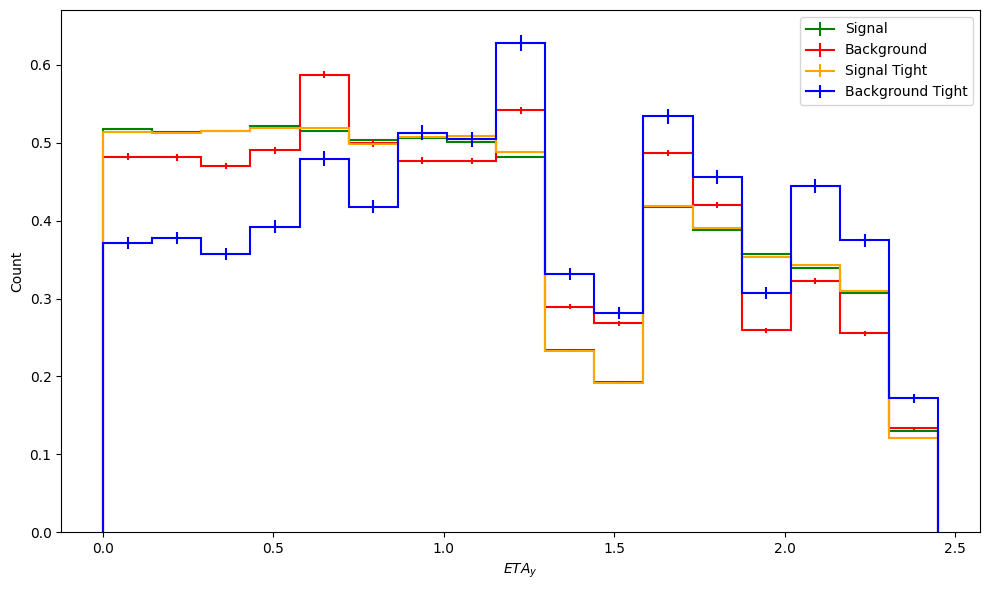

In [35]:
plt.figure(figsize=(10, 6))

den_eta_sig.plot1d(label='Signal', density=True, color='green')
den_eta_bkg.plot1d(label='Background', density=True, color='red')

num_eta_sig_tight.plot1d(label='Signal Tight', density=True, color='orange')
num_eta_bkg_tight.plot1d(label='Background Tight', density=True, color='blue')

plt.xlabel("$ETA_y$")
plt.ylabel("Count")
plt.legend()

#plt.savefig("/home/chardong/y_identification/Venv/save_plots/variables_distrib_simple_plots/bkg+sig_GAMMA_distribution_sample_hard_scattering")

plt.tight_layout()
plt.show()

# Compute efficiency and rejection for cut-based Tight identification on y_eta parameter

In [36]:
eff_eta_sig_tight = (num_eta_sig_tight/den_eta_sig).values()
efferr_eta_sig_tight = np.sqrt(eff_eta_sig_tight*(1.-eff_eta_sig_tight)/den_eta_sig.values()) # binomial uncertainty on efficiency

eff_eta_bkg_tight = (num_eta_bkg_tight/den_eta_bkg).values()
efferr_eta_bkg_tight = np.sqrt(eff_eta_bkg_tight*(1.-eff_eta_bkg_tight)/den_eta_bkg.values()) # binomial uncertainty on efficiency

In [37]:
eta = axis_eta.centers

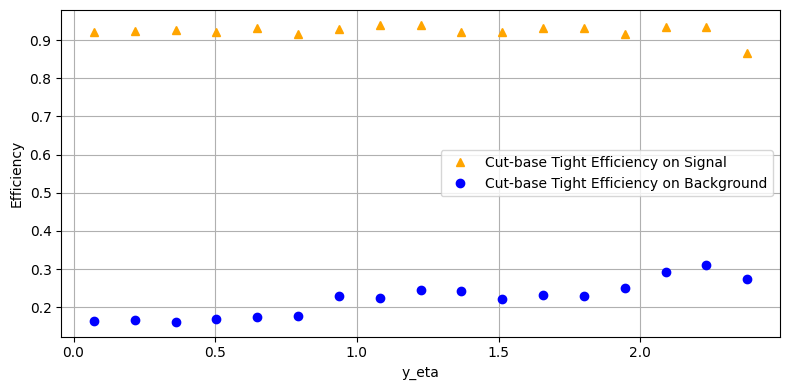

In [38]:
plt.figure(figsize=(8, 4))

plt.errorbar(eta, eff_eta_sig_tight, label="Cut-base Tight Efficiency on Signal ", fmt="^", color="orange")
plt.errorbar(eta, eff_eta_bkg_tight, label="Cut-base Tight Efficiency on Background", fmt="o", color="blue")


plt.xlabel("y_eta")
plt.ylabel("Efficiency")
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig(savedir + "CBTeff_rejection_efficiency/CBTeff_yeta.pdf")

plt.show()

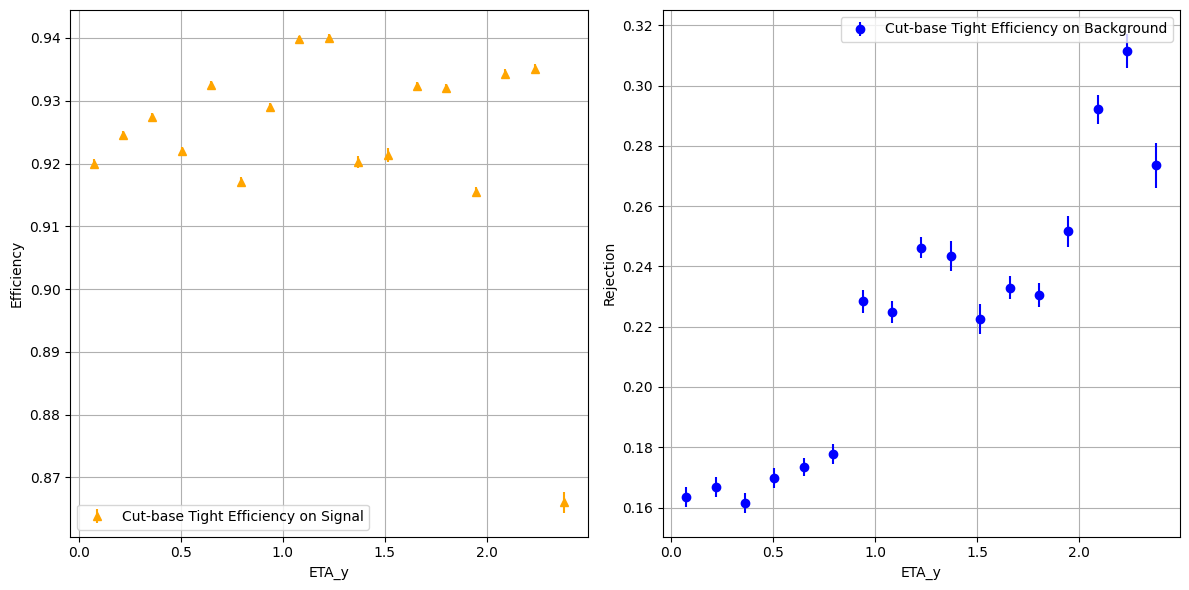

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Tracer sur le premier axe pour le signal
ax[0].errorbar(eta, eff_eta_sig_tight, yerr=efferr_eta_sig_tight, label="Cut-base Tight Efficiency on Signal", fmt='^', color="orange")
ax[0].set_xlabel("ETA_y")
ax[0].set_ylabel("Efficiency")
ax[0].legend()
ax[0].grid(True)

# Tracer sur le deuxième axe pour le background
ax[1].errorbar(eta, eff_eta_bkg_tight, yerr=efferr_eta_bkg_tight, label="Cut-base Tight Efficiency on Background", fmt='o', color="blue")
ax[1].set_xlabel("ETA_y")
ax[1].set_ylabel("Rejection")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()

#plt.savefig(savedir + "CBTeff_rejection_efficiency/CBT_eff_rejct_ETA_y.pdf")

plt.show()


# Efficiency and rejection for cut-based Tight identification on evt_mu w.r.t y_eta

In [40]:
axis_mu = hist.axis.Variable(mu_bins, name='evt_mu', label=r"$evt_\mu$ [GeV]")

In [41]:
# Convertir histogramme en listes ou arrays pour tracer avec matplotlib
mu = axis_mu.centers

In [42]:
# Histograms and Axes pour `mu` et 'eta'
den_sig = hist.Hist(axis_eta, axis_mu).fill(df_sig["y_abs_eta"], df_sig["evt_mu"])
den_bkg = hist.Hist(axis_eta, axis_mu).fill(df_bkg["y_abs_eta"], df_bkg["evt_mu"])

num_sig_tight = hist.Hist(axis_eta, axis_mu).fill(df_sig_tight["y_abs_eta"], df_sig_tight["evt_mu"])
num_bkg_tight = hist.Hist(axis_eta, axis_mu).fill(df_bkg_tight["y_abs_eta"], df_bkg_tight["evt_mu"])

eff_sig_tight = (num_sig_tight/den_sig).values()
efferr_sig_tight = np.sqrt(eff_sig_tight*(1.-eff_sig_tight)/den_sig.values()) # binomial uncertainty on efficiency

eff_bkg_tight = (num_bkg_tight/den_bkg).values()
efferr_bkg_tight = np.sqrt(eff_bkg_tight*(1.-eff_bkg_tight)/den_bkg.values()) # binomial uncertainty on efficiency

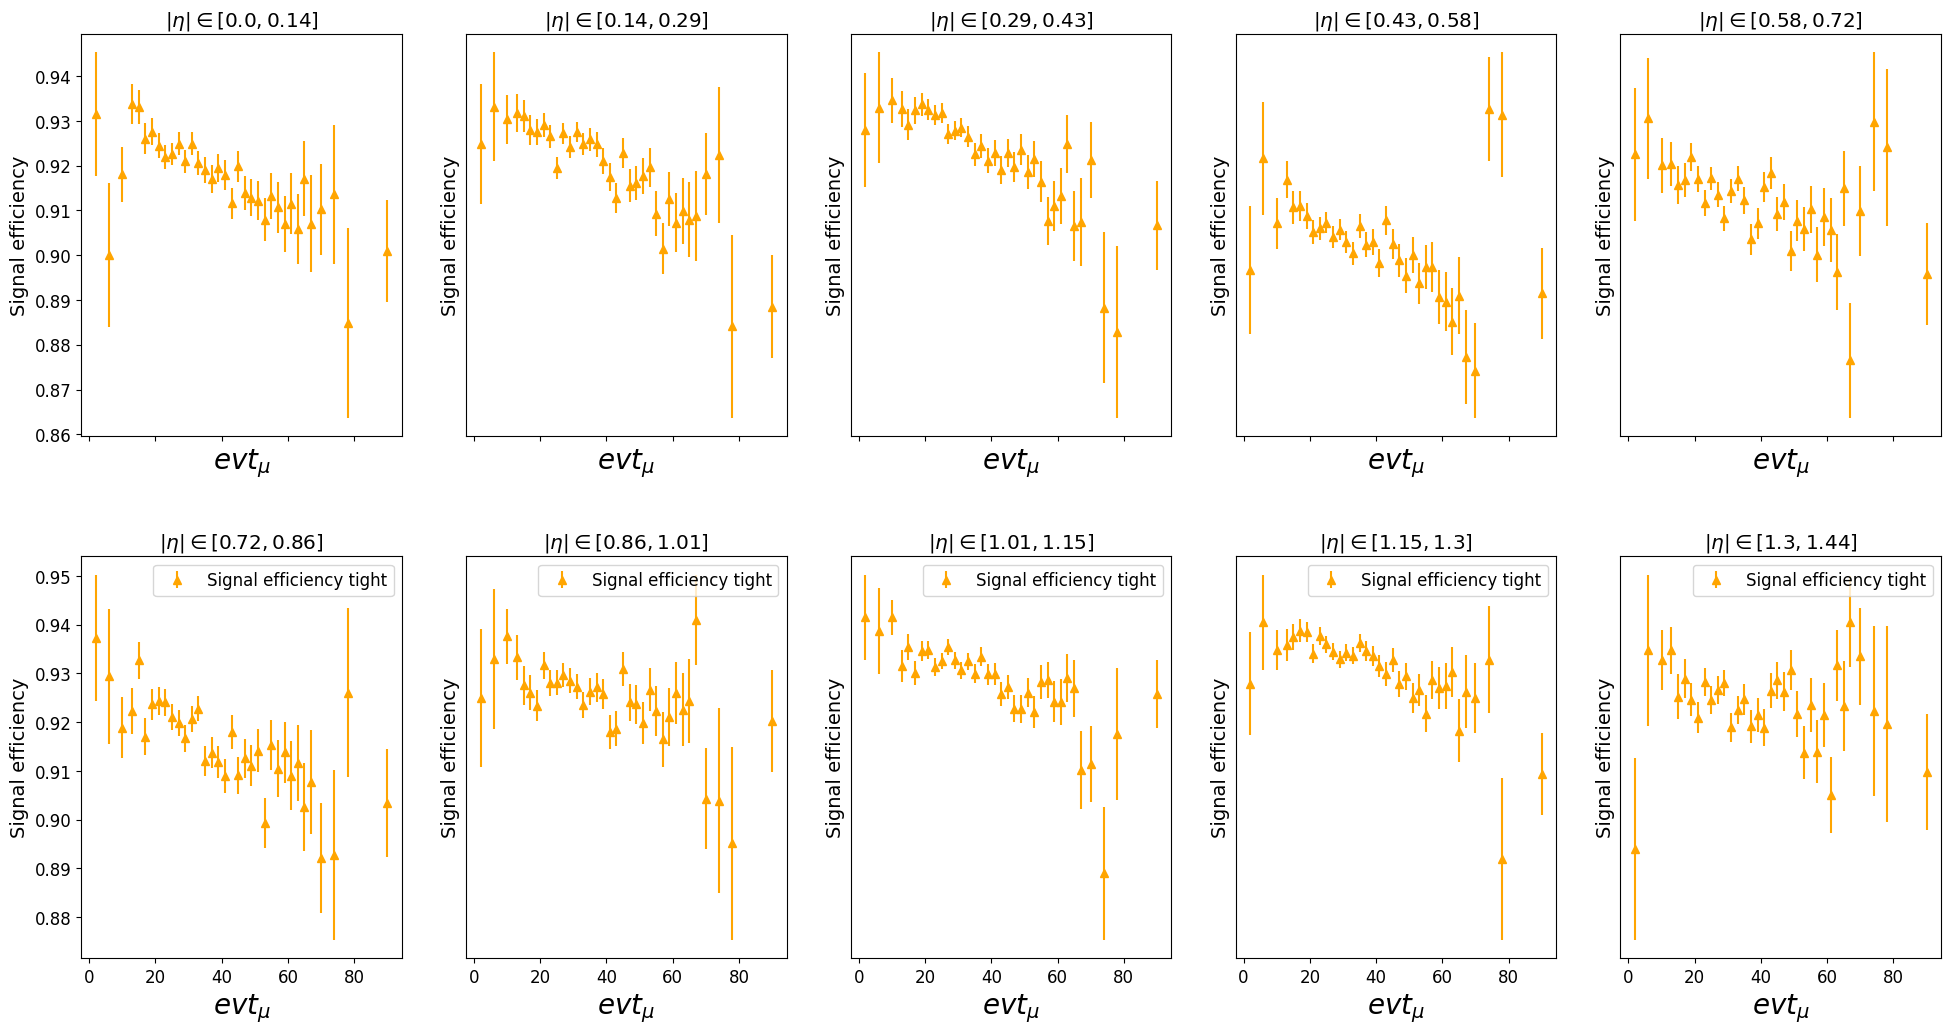

In [43]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(24, 12), sharex=True)
fig.subplots_adjust(wspace=0.2, hspace=0.3)

for i in range(10):
    row, col = divmod(i, 5)  

    # courbes de l'efficacité
    ax[row, col].errorbar(mu, eff_sig_tight[i], efferr_sig_tight[i],
                          fmt="^", label='Signal efficiency tight', color='orange')
    #ax[row, col].set_xscale('log')


    text = f"$|\eta| \in [{round(axis_eta.edges[i], 2)}, {round(axis_eta.edges[i + 1], 2)}]$"
    ax[row, col].set(title=text)

    if col != 0:
        ax[row, col].set_yticks([])

    if row == 1:
        ax[row, col].legend(fontsize=12)

    ax[row, col].set_ylabel("Signal efficiency", fontsize=14)
    ax[row, col].set_xlabel("$evt_{\mu}$", fontsize=20)

#plt.savefig(savedir + "CBTeff_rejection_efficiency/Finetune_CBT_eff_evt_mu_into_gamma_bin.pdf")

plt.show()